# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

weather_data = pd.DataFrame()
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)


['ha tinh', 'colquechaca', 'mar del plata', 'tasiilaq', 'hobart', 'rikitea', 'aquiraz', 'arraial do cabo', 'east london', 'hilo', 'belushya guba', 'bluff', 'wanaka', 'busselton', 'husavik', 'ningan', 'hasaki', 'jafarpur', 'qaanaaq', 'illoqqortoormiut', 'syasstroy', 'gunjur', 'thompson', 'esna', 'kodiak', 'umm kaddadah', 'ushuaia', 'punta arenas', 'jamestown', 'yarensk', 'sinnamary', 'upernavik', 'tsihombe', 'bambari', 'mataura', 'kerteh', 'belen', 'cape town', 'sentyabrskiy', 'ilulissat', 'hokitika', 'castro', 'yatou', 'bredasdorp', 'solnechnyy', 'isangel', 'albany', 'kamenka', 'cabra', 'fukue', 'barentsburg', 'port elizabeth', 'kapaa', 'westport', 'mahebourg', 'pumiao', 'vilhena', 'burnie', 'taolanaro', 'fethiye', 'vao', 'kruisfontein', 'avarua', 'viedma', 'cherskiy', 'geraldton', 'vieques', 'bambous virieux', 'omsukchan', 'victoria', 'hambantota', 'kloulklubed', 'buzmeyin', 'paveh', 'katobu', 'cayenne', 'puerto ayora', 'aksu', 'faanui', 'new norfolk', 'utiroa', 'svetlaya', 'tuktoyakt

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


record = 1


for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
       
        record= record + 1
        time.sleep(1.01)
        
    
    except:
        print("City not found.")
    continue


Processing Record 1 | Ha Tinh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=ha tinh
Processing Record 2 | Colquechaca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=colquechaca
Processing Record 3 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=mar del plata
Processing Record 4 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=tasiilaq
Processing Record 5 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=hobart
Processing Record 6 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=rikitea
Processing Record 7 | Aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=a

Processing Record 58 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=geraldton
Processing Record 59 | Vieques
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=vieques
Processing Record 60 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=bambous virieux
Processing Record 61 | Omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=omsukchan
Processing Record 62 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=victoria
Processing Record 63 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=hambantota
Processing Record 64 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8

Processing Record 115 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=vaini
Processing Record 116 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=clyde river
Processing Record 117 | Shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=shache
Processing Record 118 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=carnarvon
City not found.
Processing Record 119 | Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=aykhal
Processing Record 120 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=los llanos de aridane
Processing Record 121 | Canala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 171 | Paka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=paka
City not found.
Processing Record 172 | Dutlwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=dutlwe
City not found.
Processing Record 173 | Cocal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=cocal
Processing Record 174 | Linjiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=linjiang
Processing Record 175 | Massakory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=massakory
Processing Record 176 | Tegal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=tegal
Processing Record 177 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4

City not found.
Processing Record 227 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=srednekolymsk
City not found.
Processing Record 228 | Bucerias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=bucerias
Processing Record 229 | Bronnoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=bronnoysund
Processing Record 230 | Carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=carutapera
Processing Record 231 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=iqaluit
Processing Record 232 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=anadyr
City not found.
Processing Record 233 | Ponta Delgada
http://api.openweathermap.org/

Processing Record 283 | Luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=luderitz
City not found.
Processing Record 284 | Pitkyaranta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=pitkyaranta
Processing Record 285 | Inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=inuvik
Processing Record 286 | Booue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=booue
Processing Record 287 | Deqing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=deqing
Processing Record 288 | Biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=biak
City not found.
Processing Record 289 | Manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a

Processing Record 339 | Ocala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=ocala
Processing Record 340 | Verkh-Usugli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=verkh-usugli
Processing Record 341 | Redcar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=redcar
Processing Record 342 | Mende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=mende
Processing Record 343 | Marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=marzuq
Processing Record 344 | Mastic Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=mastic beach
Processing Record 345 | Batticaloa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0

Processing Record 396 | Barmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=barmer
Processing Record 397 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=tautira
City not found.
Processing Record 398 | Mechetinskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=mechetinskaya
Processing Record 399 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=longyearbyen
Processing Record 400 | Chegdomyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=chegdomyn
Processing Record 401 | Shestakovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=shestakovo
Processing Record 402 | Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 451 | Borujerd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=borujerd
Processing Record 452 | Sindor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=sindor
Processing Record 453 | Conakry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=conakry
Processing Record 454 | Ipixuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=ipixuna
Processing Record 455 | Inirida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=inirida
Processing Record 456 | Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=karratha
Processing Record 457 | Kemin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=kemin
P

Processing Record 507 | Birao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=birao
Processing Record 508 | Horsham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=horsham
Processing Record 509 | Itumbiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=itumbiara
Processing Record 510 | Lermontovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=lermontovka
City not found.
Processing Record 511 | Sao Gabriel da Cachoeira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=sao gabriel da cachoeira
Processing Record 512 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13757bc7d06a8a2ea70c4d281c0afd0d&q=college
Processing Record 513 | San Ignacio
http://api.openweathermap.org/data/2.5/weather?u

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
cities_dict = { 
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

weather_city =pd.DataFrame(cities_dict)

#print(weather_city)

weather_city.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

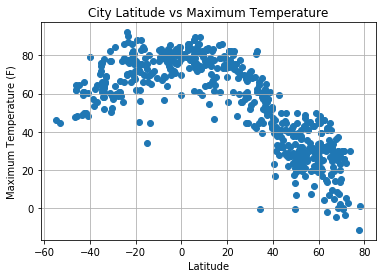

In [35]:
plt.scatter(lat,max_temp)
plt.title("City Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid()
plt.savefig('Latitude vs Max Temperature')

From the graph 'Latitude Vs Max Temperature' we can see that the closer a city is to the equator the warmer the maximum temperature is. 

#### Latitude vs. Humidity Plot

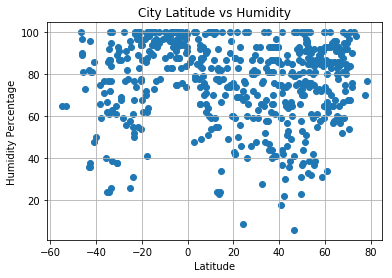

In [34]:
plt.scatter(lat,humidity)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.grid()
plt.savefig('Latitude vs Humidity')

From the graph 'Latitude vs. Humitidy' we can see a possible coorelation of increased cloudiness from -20 to 20 degrees latitude. Further statistical testing would be need to see if coorelation is statistically signficant. 

#### Latitude vs. Cloudiness Plot

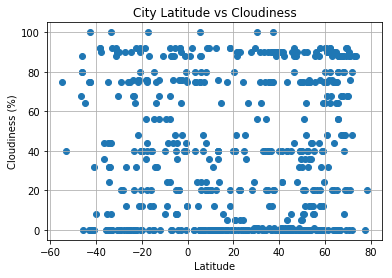

In [33]:
plt.scatter(lat,cloudiness)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('Latitude vs Cloudiness')

From the graph 'Latitude vs Cloudiness' we cannot visably see correlation between cloudiness and distance from equator. 

#### Latitude vs. Wind Speed Plot

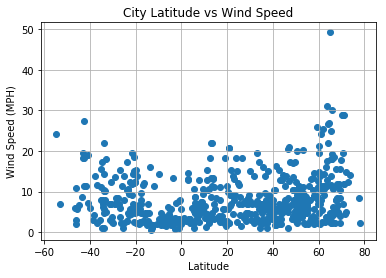

In [32]:
plt.scatter(lat,wind_speed)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig('Latitude vs Wind Speed')

From the graph 'Latitude vs Windspeed' we again cannot visably see correlation between windspeed and distance from equator. There is a possible outlier of 50 miles per hour. It would need to be looked into further to see if that city was experiencing unusual wind speeds. 